# The simplest quadcoil example
This is the simplest quadcoil example solving the NESCOIL problem
1 minor radius away from the plasma surface. Requires simsopt to load
the surfaces.

In [2]:
from quadcoil import quadcoil
from simsopt.mhd import Vmec

In [3]:
equil_qs = Vmec('wout_LandremanPaul2021_QA_lowres.nc', keep_all_files=True)
plasma_surface = equil_qs.boundary
net_poloidal_current_amperes = equil_qs.external_current()

In [4]:
nescoil_out_dict, nescoil_qp, nescoil_phi_mn, _ = quadcoil(
    nfp=plasma_surface.nfp,
    stellsym=plasma_surface.stellsym,
    mpol=4, # 4 poloidal harmonics for the current potential
    ntor=4, # 4 toroidal harmonics for the current potential
    plasma_dofs=plasma_surface.get_dofs(),
    plasma_mpol=plasma_surface.mpol,
    plasma_ntor=plasma_surface.ntor,
    net_poloidal_current_amperes=net_poloidal_current_amperes,
    net_toroidal_current_amperes=0.,
    plasma_coil_distance=plasma_surface.minor_radius(),
    # Set the objective to 
    # f_B
    objective_name='f_B',
    objective_weight=None,
    objective_unit=None,
    # Set the output metrics to f_B and f_K
    metric_name=('f_B', 'f_K')
)

Text(0, 0.5, 'Toroidal angle $\\phi$')

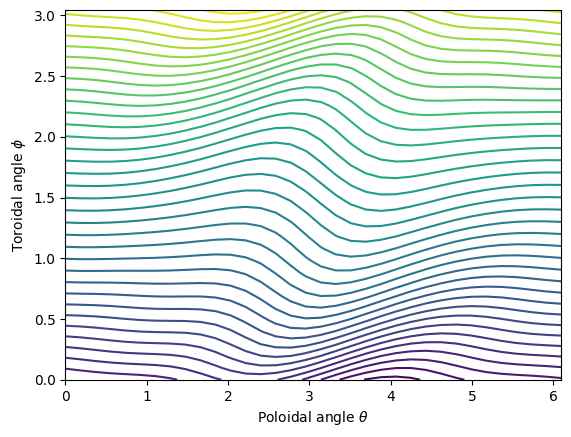

In [9]:
# Plotting the solution
from quadcoil.quantity import Phi_with_net_current
import matplotlib.pyplot as plt
import numpy as np

plt.contour(
    np.pi*2*nescoil_qp.eval_surface.quadpoints_theta,
    np.pi*2*nescoil_qp.eval_surface.quadpoints_phi, 
    Phi_with_net_current(nescoil_qp, nescoil_phi_mn), 
    levels=40
)
plt.xlabel(r'Poloidal angle $\theta$')
plt.ylabel(r'Toroidal angle $\phi$')